# 1. Basic Data Cleaning and EDA

In [1]:
#!pip install pyvis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
# cash table
cash = pd.read_csv("cash_trxns.csv")
cash

,cust_id,amount,type,trxn_id
0,CUST69827909,2330,deposit,XFMC87396884
1,CUST78509707,4800,deposit,BFMG48785876
2,CUST71480951,6510,withdrawal,TIAX63158064
3,CUST70854140,1715,deposit,IVIV63658514
4,CUST57406487,3770,withdrawal,TCBO25660159
...,...,...,...,...
212527,CUST78377468,7865,deposit,MJCB69824853
212528,CUST82786181,2770,withdrawal,NHMW63689084
212529,CUST30355964,7495,withdrawal,TDEC59530987
212530,CUST95759935,19290,deposit,YBWD65526690


In [4]:
# email money transfer table
emt = pd.read_csv("emt_trxns.csv")
emt

,id sender,id receiver,name sender,name receiver,emt message,emt value,trxn_id
0,CUST26232205,CUST94681618,JASON GARRISON,RENEE LANG,for the bike u lent me,154.0,WFEZ76031047
1,EXTERNAL623153,CUST59533929,GINA WISE,BRIAN HAMILTON,NaN,1170.5,RAUG63886259
2,CUST35533148,CUST23126187,ANTHONY ROBERSON,NICHOLAS DODSON,NaN,518.0,XQJS86205330
3,CUST59096559,EXTERNAL470507,KEVIN PARK,FREDERICK CARPENTER,NaN,46.0,WPXP45854083
4,CUST69049633,EXTERNAL818528,ZHU FENG LAN,ROMIL LANKA,NaN,570.0,OIRZ70883325
...,...,...,...,...,...,...,...
506446,EXTERNAL484002,CUST74979363,ALEXANDRA GRANT,WANDA HAYDEN,NaN,119.0,USHN74907347
506447,CUST12188131,CUST68693554,JASMIN SMITH,MICHAEL CRUZ,NaN,208.0,VXES44436032
506448,EXTERNAL470333,CUST90504001,NOAH BELL,MR. ERIC WALTERS,Fox racing motocross gear,150.0,LTUK21435620
506449,EXTERNAL732393,CUST99824006,LAURENT DESBIENS,JOHN HUNT JR.,NaN,270.0,OIRO35201076


In [5]:
# wire transactions
wire = pd.read_csv("wire_trxns.csv")
wire

,id sender,id receiver,name sender,name receiver,wire value,country sender,country receiver,trxn_id
0,EXTERNAL753550,CUST30139466,CHEN MIN,DESTINY MOORE,10098.0,CN,CA,TKEV83070517
1,CUST43146787,CUST94438297,DR. BENJAMÍN PAREDES,BOBBY SERRANO,1267.0,CA,CA,LWCS42954834
2,CUST82396415,EXTERNAL842611,WHITNEY WRIGHT,VICTORIA HOGAN,8591.0,CA,US,NTTG55749308
3,EXTERNAL851271,CUST84545757,DR.TRACY MOODY,MINDY BURGESS,1480.5,CA,CA,IXVD84599097
4,EXTERNAL685849,CUST14982223,JEREMY WHITE,NITARA BARMAN,13310.0,AU,CA,TIGB41956889
...,...,...,...,...,...,...,...,...
67867,CUST89899937,EXTERNAL470484,ÉLISABETH BENOÎT,DANIEL SHEPPARD,5067.0,CA,CA,KVQK50168638
67868,CUST59834819,EXTERNAL634239,EMMA RICHARD,WANG HUA,18874.0,CA,CN,IUIP17370739
67869,CUST49543616,EXTERNAL147586,THOMAS EVANS,ANNE THOMPSON,1034.5,CA,US,SYRW79049777
67870,CUST31344256,CUST78691452,DR. JANET DIAZ,TIMOTHY BENNETT,4084.0,CA,CA,ZHVK78574815


In [6]:
# customer information table
kyc = pd.read_csv("kyc.csv")
kyc

,Name,Gender,Occupation,Age,Tenure,cust_id,label
0,JENNIFER WELLS,female,Architect,45.0,13.0,CUST82758793,0
1,ANTHONY ADAMS,male,Musician,52.0,8.0,CUST69248708,0
2,DENISE LEWIS,female,Jewelry Dealer,43.0,11.0,CUST67222818,0
3,STEPHEN FIGUEROA,male,Optometrist,35.0,17.0,CUST33995820,0
4,KYLE EDWARDS,male,Real Estate Broker,39.0,21.0,CUST76401392,1
...,...,...,...,...,...,...,...
195784,THOMAS YOUNG,male,Software Developer,46.0,3.0,CUST23014082,0
195785,CASEY JONES,male,Miner,31.0,10.0,CUST17691251,0
195786,NICOLE-CÉCILE LEBLANC,female,Unknown,21.0,3.0,CUST26444112,0
195787,CATHERINE ARMSTRONG,female,Antiques Dealer,58.0,14.0,CUST96567835,0


# Create Occupation Categories

We created categories by grouping occupations into a similar topic so that when we conduct community analyis later on, it will be easier to to filter for our interested categories. For example, since we are trying to detect illegal wildlife trafficking, we might be more focused on communities that have High-Risk-Individuals (HRI) with occupations in the animal or transport categories.

In [7]:
# Create broader categories for Occupation
sports = ['Sports Agent']

gamble = ['Online Gambling Site Operator', 'Casino Operator']

sales = ['Retail Salesperson', 'International Salesperson', 
         'Telemarketer']

valuables = ['Antiques Dealer', 'Gemologist', 
             'Pawn Shop Owner', 'Auctioneer', 'Antique Dealer', 
             'Precious Metals Dealer', 'Luxury Goods Dealer (e.g., Art, Jewelry)', 
             'Jewelry Dealer', 'Local Fair Operator']

estate = ['Real Estate Broker', 'High-End Real Estate Developer', 'Property Manager', 
          'Real Estate Agent', 'Landlord']

owners = ['Nightclub or Bar Owner', 'Business Owner', 'Currency Exchange Owner', 
          'Private Security Company Owner', 'Cash-intensive Business Owner (e.g., Laundromat)', 
          'Loan or Finance Company Owner', 'Payment Processors Owner', 'Money Service Business Owner', 
          'Hotelier']

brokers = ['Luxury Yacht Broker', 'Commodity Broker', 
           'Private Jet Broker', 'Stock Broker']

finance = ['Offshore Trustee', 'Private Banker', 
            'Venture Capitalist', 'Private Equity Fund Manager', 
           'Hedge Fund Manager', 'Non-profit Organization Director', 
            'Virtual Asset Service Providers', 'Offshore Investment Advisor', 
            'Corporate Executive', 'Free Trade Zone Operator',
            'Cryptocurrency Trader', 'Shell Company Operator', 'Actuary', 
            'Banker', 'Economist', 'Financial Advisor', 'Tax Advisor', 
            'Trust and Company Service Provider']

animal = ['Pet Groomer', 'Biologist', 'Ichthyologist', 
          'Veterinarian', 'Malacologist', 
          'Veterinarian Assistant', 'Farmer',  
          'Animal Trainer', 'Zookeeper', 
          'Paleontologist', 'Beekeeper', 
          'Herpetologist', 'Farm Laborer', 'Oceanographer', 
          'Fisherman', 'Marine Biologist', 
          'Ornithologist',  'Nematologist', 'Entomologist', 
          'Lepidopterist']

food = ['Butcher', 'Chef', 'Food Scientist', 'Baker', 'Barista', 
        'Barista', 'Bartender', 'Brewer', 'Coffee Roaster', 
        'Dietician', 'Distiller', 'Enologist', 'Food Critic', 
        'Pastry Chef', 'Sommelier']

enviro = ['Hydrologist', 'Environmental Scientist', 'Bioengineer', 
          'Limnologist','Forester', 'Marine Engineer', 'Dendrochronologist',
          'Glaciologist', 'Volcanologist', 'Miner', 'Arborist', 
          'Seismologist', 'Mycologist', 'Cryoseismologist', 'Arborist', 
          'Archaeologist', 'Astronomer', 'Florist', 'Gardener', 'Geologist', 
          'Meteorologist', 'Urban Planner', 'Landscaper']

transport = ['Import/Export Dealer', 'Bus Driver', 'Postal Worker', 'Warehouse Worker', 
             'Auto Dealer', 'Taxi Driver', 'School Bus Driver', 
             'Mechanic', 'Flight Attendant', 'Travel Agent', 
             'Maritime or Shipping Agent', 'Pilot', 'Travel Agency Owner', 
             'Import/Export Business Owner', 'Car Dealership Owner']

health = ['Psychologist', 'Research Scientist', 'Doctor', 
          'Research Scientist', 'Astrophysicist', 'Political Scientist', 
          'Chiropractor', 'Chemist', 'Pedologist', 'Dentist', 
          'Home Health Aide', 'Pediatrician', 'Nurse', 'Pharmacist', 
          'Therapist', 'Massage Therapist', 'Physical Therapist', 
          'Radiologist', 'Ethnobotanist', 'Physicist', 
          'Kinesiologist', 'Paramedic', 'Surgeon', 'Anesthesiologist', 
          'Osteologist', 'Nutritionist', 'Fitness Trainer', 'Optometrist']

niche = ['Cartographer', 'Ceramicist',  'Ethnomusicologist', 
         'Graphologist', 'Numismatist', 'Philatelist', 
         'Semiotician', 'Vexillologist']

study = ['Egyptologist', 'Sinologist', 'Linguist', 
         'Historian', 'Sociologist']

film = ['Actor', 'Film Editor', 'Filmmaker', 'Set Designer', 
        'TV Producer', 'Theater Director', 'Videographer', 
        'Voice Actor']

music = ['DJ', 'Local Radio Operator', 'Luthier', 
         'Music Producer', 'Musician', 'Radio Host', 
         'Sound Engineer', 'Choreographer']

art = ['Artist', 'Art Gallery Owner', 'Art Dealer', 
       'Cicerone', 'Curator', 'Art Critic', 
       'Art Historian', 'Graphic Artist', 'Printmaker', 
       'Tattoo Artist', 'Fashion Designer', 'Sculptor']

books = ['Author', 'Cartoonist', 'Comic Book Artist', 
         'Freelancer (e.g., Graphic Designer, Writer)', 
         'Illustrator', 'Librarian', 'Librarian Assistant', 
         'Librettist', 'Literary Critic', 'Book Editor']

building = ['Architect', 'Carpenter', 'Construction Contractor', 
            'Construction Worker', 'Electrician', 
            'Interior Designer']

services = ['Makeup Artist', 'Event Planner', 'Cleaner', 
            'Plumber', 'Window Cleaner', 'Cashier', 'Civil Servant',
           'Fast Food Worker', 'Grocery Store Clerk', 
            'Hairstylist', 'Photographer', 'Social Worker', 
            'Waiter/Waitress', 'Wedding Planner', 'Tailor', 
            'Lifeguard', 'Firefighter', 'Police Officer', 
            'Security Guard', 'Translator','Tour Guide', 
            'Call Center Representative', 'Receptionist', 
            'Factory Worker', 'International Consultant']

student = ['Childcare Worker', 'Private Tutor', 'Nanny', 'School Teacher', 
           'Student', 'University Professor']

code = ['Engineer', 'Game Developer', 'Software Developer']

news = ['Journalist', 'Lawyer', 'News Anchor', 
        'Notary Public']

stats = ['Statistician', 'Surveyor']

vague = ['Other', 'Unknown', 'Retired', 'Unemployed']

In [8]:
# Create a list storing the different categories
cates = [sports, gamble, sales, valuables, estate, owners, brokers, finance, animal, food, enviro, transport, health, niche, study, film, music, art, books, building, services, student, code, news, stats, vague]

In [9]:
# create a list to store the names of the variables
names = ['sports', 'gamble', 'sales', 'valuables', 'estate', 'owners', 'brokers', 'finance', 'animal', 'food', 'enviro', 'transport', 'health', 'niche', 'study', 'film', 'music', 'art', 'books', 'building', 'services', 'student', 'code', 'news', 'stats', 'vague']

In [10]:
# create a copy of the kyc data and add new variables based on occupation categories
ind_info = kyc.copy()

In [11]:
# loop through the categories and add booleans for whether individual's occupation is in that category
for i in range(len(cates)):
    
    # Get boolean for whether individual falls in the occupation category
    b = kyc['Occupation'].isin(cates[i])
    
    # get variable name
    var_name = names[i]
    
    # set record to 1 for var if individual is in occupation category
    ind_info.loc[b, var_name] = 1
    
# fill null values (those not equal to 1) to 0
ind_info = ind_info.fillna(0)

# convert to int
for name in names:
    ind_info[name] = ind_info[name].astype(int)

# Merge Customer info to Transaction DFs

In [12]:
# append customer information to the cash table
cash1 = pd.merge(cash, ind_info, how='left', on='cust_id')
cash1

,cust_id,amount,type,trxn_id,Name,Gender,Occupation,Age,Tenure,label,...,music,art,books,building,services,student,code,news,stats,vague
0,CUST69827909,2330,deposit,XFMC87396884,THERESA JACOBS,female,Unknown,62.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
1,CUST78509707,4800,deposit,BFMG48785876,LUCY-OCÉANE VINCENT,female,Real Estate Agent,33.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,CUST71480951,6510,withdrawal,TIAX63158064,PRISHA BALAN,male,Other,32.0,3.0,0,...,0,0,0,0,0,0,0,0,0,1
3,CUST70854140,1715,deposit,IVIV63658514,CHENG HONG XIA,male,Other,38.0,4.0,0,...,0,0,0,0,0,0,0,0,0,1
4,CUST57406487,3770,withdrawal,TCBO25660159,MIKE HANSON,other,Carpenter,36.0,8.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212527,CUST78377468,7865,deposit,MJCB69824853,KARTIK KAKAR,female,"Freelancer (e.g., Graphic Designer, Writer)",45.0,5.0,0,...,0,0,1,0,0,0,0,0,0,0
212528,CUST82786181,2770,withdrawal,NHMW63689084,JAIME CLINE,male,Notary Public,68.0,18.0,0,...,0,0,0,0,0,0,0,1,0,0
212529,CUST30355964,7495,withdrawal,TDEC59530987,DANIELLE LOGAN,female,Import/Export Dealer,44.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
212530,CUST95759935,19290,deposit,YBWD65526690,CRAIG MITCHELL,male,Taxi Driver,48.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# append customer information to the emt table
emt_copy1 = emt.copy().rename(columns={'id sender': 'cust_id'})
emt1 = pd.merge(emt_copy1, kyc, how='left', on='cust_id')
emt1 = emt1.rename(columns={'Name': 'sender_Name', 
                            'Gender': 'sender_Gender', 
                            'Occupation': 'sender_Occupation', 
                            'Age': 'sender_Age', 
                            'Tenure': 'sender_Tenure', 
                            'label': 'sender_label', 
                            'cust_id': 'id sender', 
                            'id receiver': 'cust_id'})
emt2 = pd.merge(emt1, kyc, how='left', on='cust_id')
emt2 = emt2.rename(columns={'Name': 'receiver_Name', 
                            'Gender': 'receiver_Gender', 
                            'Occupation': 'receiver_Occupation', 
                            'Age': 'receiver_Age', 
                            'Tenure': 'receiver_Tenure', 
                            'label': 'receiver_label', 
                            'cust_id': 'id receiver'})
emt2

,id sender,id receiver,name sender,name receiver,emt message,emt value,trxn_id,sender_Name,sender_Gender,sender_Occupation,sender_Age,sender_Tenure,sender_label,receiver_Name,receiver_Gender,receiver_Occupation,receiver_Age,receiver_Tenure,receiver_label
0,CUST26232205,CUST94681618,JASON GARRISON,RENEE LANG,for the bike u lent me,154.0,WFEZ76031047,JASON GARRISON,male,Luthier,32.0,13.0,0.0,RENEE LANG,female,Other,43.0,8.0,0.0
1,EXTERNAL623153,CUST59533929,GINA WISE,BRIAN HAMILTON,NaN,1170.5,RAUG63886259,NaN,NaN,NaN,NaN,NaN,NaN,BRIAN HAMILTON,male,Import/Export Dealer,37.0,6.0,0.0
2,CUST35533148,CUST23126187,ANTHONY ROBERSON,NICHOLAS DODSON,NaN,518.0,XQJS86205330,ANTHONY ROBERSON,male,Hotelier,48.0,18.0,0.0,NICHOLAS DODSON,male,"Freelancer (e.g., Graphic Designer, Writer)",20.0,0.0,0.0
3,CUST59096559,EXTERNAL470507,KEVIN PARK,FREDERICK CARPENTER,NaN,46.0,WPXP45854083,KEVIN PARK,male,Import/Export Business Owner,34.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,CUST69049633,EXTERNAL818528,ZHU FENG LAN,ROMIL LANKA,NaN,570.0,OIRZ70883325,ZHU FENG LAN,male,Retail Salesperson,35.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506446,EXTERNAL484002,CUST74979363,ALEXANDRA GRANT,WANDA HAYDEN,NaN,119.0,USHN74907347,NaN,NaN,NaN,NaN,NaN,NaN,WANDA HAYDEN,female,Cashier,27.0,1.0,0.0
506447,CUST12188131,CUST68693554,JASMIN SMITH,MICHAEL CRUZ,NaN,208.0,VXES44436032,JASMIN SMITH,female,Event Planner,46.0,9.0,0.0,MICHAEL CRUZ,male,Unknown,35.0,0.0,0.0
506448,EXTERNAL470333,CUST90504001,NOAH BELL,MR. ERIC WALTERS,Fox racing motocross gear,150.0,LTUK21435620,NaN,NaN,NaN,NaN,NaN,NaN,MR. ERIC WALTERS,male,Real Estate Broker,29.0,5.0,0.0
506449,EXTERNAL732393,CUST99824006,LAURENT DESBIENS,JOHN HUNT JR.,NaN,270.0,OIRO35201076,NaN,NaN,NaN,NaN,NaN,NaN,JOHN HUNT JR.,male,Jewelry Dealer,33.0,2.0,0.0


In [14]:
# append customer information to the wire table
wire_copy1 = wire.copy().rename(columns={'id sender': 'cust_id'})
wire1 = pd.merge(wire_copy1, kyc, how='left', on='cust_id')
wire1 = wire1.rename(columns={'Name': 'sender_Name', 
                            'Gender': 'sender_Gender', 
                            'Occupation': 'sender_Occupation', 
                            'Age': 'sender_Age', 
                            'Tenure': 'sender_Tenure', 
                            'label': 'sender_label', 
                            'cust_id': 'id sender', 
                            'id receiver': 'cust_id'})
wire2 = pd.merge(wire1, kyc, how='left', on='cust_id')
wire2 = wire2.rename(columns={'Name': 'receiver_Name', 
                            'Gender': 'receiver_Gender', 
                            'Occupation': 'receiver_Occupation', 
                            'Age': 'receiver_Age', 
                            'Tenure': 'receiver_Tenure', 
                            'label': 'receiver_label', 
                            'cust_id': 'id receiver'})
wire2

,id sender,id receiver,name sender,name receiver,wire value,country sender,country receiver,trxn_id,sender_Name,sender_Gender,sender_Occupation,sender_Age,sender_Tenure,sender_label,receiver_Name,receiver_Gender,receiver_Occupation,receiver_Age,receiver_Tenure,receiver_label
0,EXTERNAL753550,CUST30139466,CHEN MIN,DESTINY MOORE,10098.0,CN,CA,TKEV83070517,NaN,NaN,NaN,NaN,NaN,NaN,DESTINY MOORE,female,Gemologist,33.0,7.0,0.0
1,CUST43146787,CUST94438297,DR. BENJAMÍN PAREDES,BOBBY SERRANO,1267.0,CA,CA,LWCS42954834,DR. BENJAMÍN PAREDES,female,Architect,34.0,0.0,0.0,BOBBY SERRANO,male,Corporate Executive,45.0,21.0,0.0
2,CUST82396415,EXTERNAL842611,WHITNEY WRIGHT,VICTORIA HOGAN,8591.0,CA,US,NTTG55749308,WHITNEY WRIGHT,female,"Freelancer (e.g., Graphic Designer, Writer)",38.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,EXTERNAL851271,CUST84545757,DR.TRACY MOODY,MINDY BURGESS,1480.5,CA,CA,IXVD84599097,NaN,NaN,NaN,NaN,NaN,NaN,MINDY BURGESS,female,Construction Contractor,56.0,21.0,0.0
4,EXTERNAL685849,CUST14982223,JEREMY WHITE,NITARA BARMAN,13310.0,AU,CA,TIGB41956889,NaN,NaN,NaN,NaN,NaN,NaN,NITARA BARMAN,male,Construction Worker,37.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67867,CUST89899937,EXTERNAL470484,ÉLISABETH BENOÎT,DANIEL SHEPPARD,5067.0,CA,CA,KVQK50168638,ÉLISABETH BENOÎT,female,Student,25.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
67868,CUST59834819,EXTERNAL634239,EMMA RICHARD,WANG HUA,18874.0,CA,CN,IUIP17370739,EMMA RICHARD,female,Stock Broker,44.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
67869,CUST49543616,EXTERNAL147586,THOMAS EVANS,ANNE THOMPSON,1034.5,CA,US,SYRW79049777,THOMAS EVANS,male,Venture Capitalist,42.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
67870,CUST31344256,CUST78691452,DR. JANET DIAZ,TIMOTHY BENNETT,4084.0,CA,CA,ZHVK78574815,DR. JANET DIAZ,female,Tour Guide,34.0,5.0,1.0,TIMOTHY BENNETT,other,Radiologist,42.0,0.0,0.0


# Export DataFrames to CSV

In [15]:
# export dataframes to csv
cash1.to_csv('cash1.csv')
emt2.to_csv('emt2.csv')
wire2.to_csv('wire2.csv')
ind_info.to_csv('ind_info.csv')

# EDA

### Summary Statistics

In [16]:
cash1.describe()

,amount,Age,Tenure,label,sports,gamble,sales,valuables,estate,owners,...,music,art,books,building,services,student,code,news,stats,vague
count,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,...,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000,212532.000000
mean,4837.756390,39.747059,8.762982,0.161020,0.010605,0.016877,0.025050,0.060847,0.169151,0.089968,...,0.011052,0.034000,0.078600,0.074878,0.063722,0.010375,0.007222,0.027144,0.001416,0.050416
std,3662.964193,11.066717,7.230034,0.367551,0.102436,0.128813,0.156278,0.239051,0.374886,0.286136,...,0.104548,0.181228,0.269114,0.263195,0.244258,0.101328,0.084678,0.162504,0.037607,0.218802
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1835.000000,32.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4490.000000,39.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6950.000000,47.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,72610.000000,88.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
wire2.describe()

,wire value,sender_Age,sender_Tenure,sender_label,receiver_Age,receiver_Tenure,receiver_label
count,67872.000000,37039.000000,37039.000000,37039.000000,48923.000000,48923.000000,48923.000000
mean,6628.374477,38.622857,8.060882,0.231189,38.421458,8.057417,0.220326
std,10326.357439,11.000278,6.825662,0.421599,11.025381,6.809514,0.414471
min,500.000000,18.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,1562.000000,31.000000,3.000000,0.000000,31.000000,3.000000,0.000000
50%,3015.250000,38.000000,7.000000,0.000000,38.000000,7.000000,0.000000
75%,7163.250000,46.000000,12.000000,0.000000,45.000000,12.000000,0.000000
max,500000.000000,88.000000,48.000000,1.000000,91.000000,49.000000,1.000000


In [18]:
emt2.describe()

,emt value,sender_Age,sender_Tenure,sender_label,receiver_Age,receiver_Tenure,receiver_label
count,506451.000000,313657.000000,313657.000000,313657.000000,390914.000000,390914.000000,390914.000000
mean,461.791488,37.091705,7.253187,0.091846,37.101511,7.251181,0.091575
std,786.002842,10.937318,6.416367,0.288808,10.935005,6.405997,0.288426
min,0.000000,18.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,64.000000,29.000000,2.000000,0.000000,29.000000,2.000000,0.000000
50%,195.000000,36.000000,6.000000,0.000000,36.000000,6.000000,0.000000
75%,518.000000,44.000000,11.000000,0.000000,44.000000,11.000000,0.000000
max,20000.000000,92.000000,49.000000,1.000000,92.000000,48.000000,1.000000


### Individual Characteristics

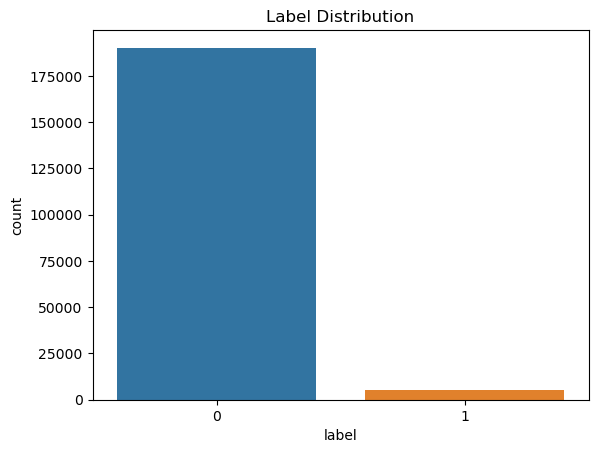

In [19]:
# plot distribution of label
ax = sns.countplot(kyc, x='label')
ax.set(title='Label Distribution');

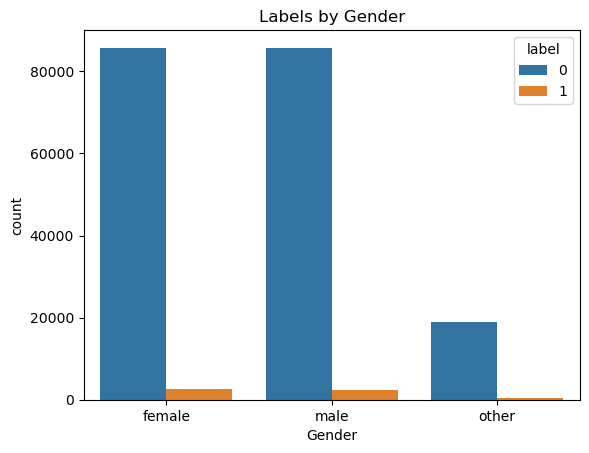

In [20]:
# Plot distibution of Gender across flagged individuals for high risk
count_gend = pd.DataFrame(ind_info.groupby(['Gender', 'label'])['cust_id'].count()).reset_index()
ax = sns.barplot(count_gend, x='Gender', y='cust_id', hue='label')
ax.set(ylabel='count', title='Labels by Gender');

### Top/Bottom Occupations

In [21]:
# plot the top 30 occupations and bottom 30
gpby_occ = pd.DataFrame(kyc.groupby(['Occupation'])['cust_id'].count())
gpby_occ = gpby_occ.sort_values(by='cust_id', ascending=False).reset_index()
gpby_occ

,Occupation,cust_id
0,Student,5610
1,"Freelancer (e.g., Graphic Designer, Writer)",3886
2,Unemployed,3236
3,Retired,2922
4,Retail Salesperson,2871
...,...,...
245,Kinesiologist,66
246,Egyptologist,64
247,Numismatist,57
248,Philatelist,25


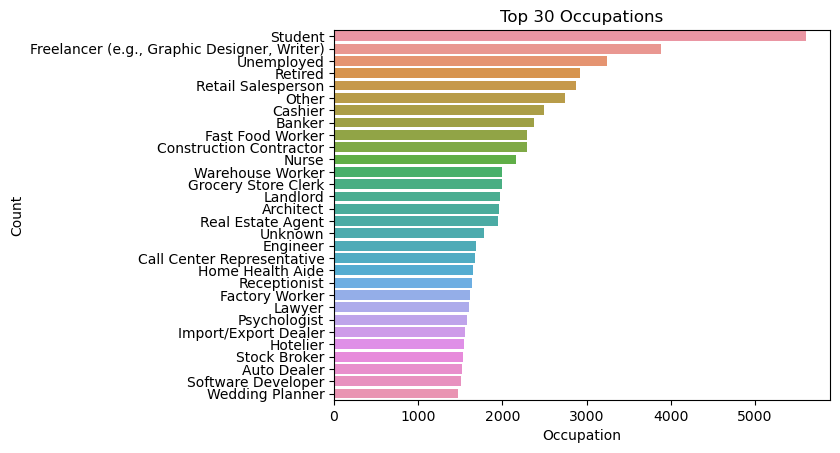

In [22]:
# plot the top 30 occupations
top30 = gpby_occ[:30]
ax = sns.barplot(top30, x='cust_id', y='Occupation', orient='h')
ax.set(xlabel='Occupation', ylabel='Count', title='Top 30 Occupations');

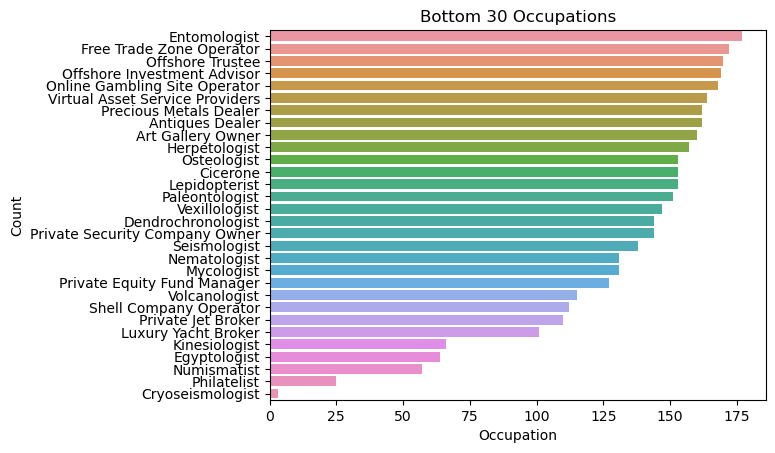

In [23]:
# plot the bottom 30 occupations
bot30 = gpby_occ[-30:]
ax = sns.barplot(bot30, x='cust_id', y='Occupation', orient='h')
ax.set(xlabel='Occupation', ylabel='Count', title='Bottom 30 Occupations');

### Percentage of HRI by Occupation Category

In [24]:
# Get the dataframe with just occupation category data
occ_cols = ['label'] + list(ind_info.iloc[:, 7:].columns)
occ_df = ind_info[occ_cols]

In [25]:
# Get total number of individuals for each occupation category
occ_counts = pd.DataFrame(occ_df.iloc[:, 1:].sum()).reset_index()
occ_counts = occ_counts.rename(columns={'index':'Occupation Category', 0:'Num Customers'})
occ_counts

,Occupation Category,Num Customers
0,sports,765
1,gamble,405
2,sales,5229
3,valuables,4172
4,estate,6079
5,owners,4239
6,brokers,1971
7,finance,8081
8,animal,9206
9,food,10981


In [26]:
# Get total number of HRIs for each occupation category
HRI_ocount = occ_df.groupby(['label']).sum().reset_index()
HRI_ocount

,label,sports,gamble,sales,valuables,estate,owners,brokers,finance,animal,...,music,art,books,building,services,student,code,news,stats,vague
0,0,732,255,5154,3744,5637,3586,1772,7088,9155,...,4953,6272,9377,7990,27631,11101,3615,3195,1150,10167
1,1,33,150,75,428,442,653,199,993,51,...,33,111,178,229,263,32,34,204,15,513


In [27]:
# get the column names
occ_cats = list(HRI_ocount.columns)[1:]

In [28]:
non_HRIc = list(HRI_ocount.iloc[:1, :].values[0])[1:]
HRIc = list(HRI_ocount.iloc[1:, :].values[0])[1:]

In [29]:
# Create a dataframe for the results
occ_counts.loc[:, 'Num Non-HRI'] = non_HRIc
occ_counts.loc[:, 'Num HRI'] = HRIc

In [30]:
# Calculate the percentage of HRI per occupation category 
occ_counts['Percent HRI'] = occ_counts['Num HRI'] / occ_counts['Num Customers']
occ_counts = occ_counts.sort_values(by='Percent HRI', ascending=False)
occ_counts

,Occupation Category,Num Customers,Num Non-HRI,Num HRI,Percent HRI
1,gamble,405,255,150,0.370370
5,owners,4239,3586,653,0.154046
7,finance,8081,7088,993,0.122881
3,valuables,4172,3744,428,0.102589
6,brokers,1971,1772,199,0.100964
4,estate,6079,5637,442,0.072709
23,news,3399,3195,204,0.060018
25,vague,10680,10167,513,0.048034
11,transport,13791,13169,622,0.045102
0,sports,765,732,33,0.043137


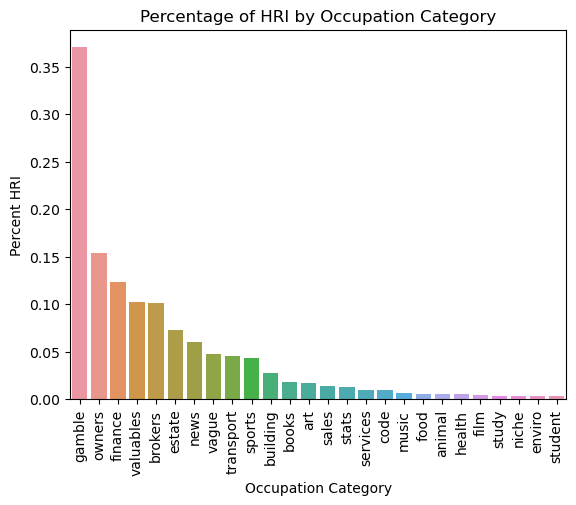

In [31]:
# Plot percentage HRI by occupation category
ax = sns.barplot(occ_counts, x='Occupation Category', y='Percent HRI')
plt.title('Percentage of HRI by Occupation Category')
plt.ylabel('Percent HRI')
plt.xticks(rotation = 90);

# Top Wire Transactions by Cust_id

In [32]:
# find the id of the sender with the most wire transactions
gpby_sender = pd.DataFrame(wire2.groupby('id sender')['id receiver'].count())
gpby_sender = gpby_sender.sort_values(by='id receiver', ascending=False).reset_index()
gpby_sender = gpby_sender.rename(columns={'id receiver': 'Number of Transactions'})
gpby_sender

,id sender,Number of Transactions
0,CUST11673473,10
1,CUST64864402,10
2,EXTERNAL897345,8
3,CUST38224940,8
4,CUST76082816,8
...,...,...
45059,CUST75824177,1
45060,CUST75823118,1
45061,CUST75815832,1
45062,CUST75793526,1


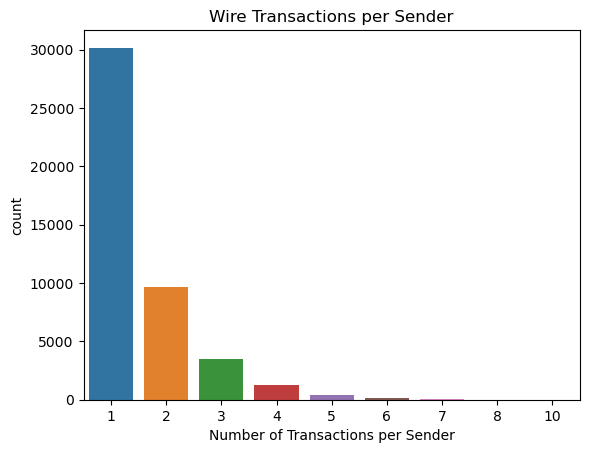

In [33]:
# plot the frequency of number of transactions per customer
ax = sns.countplot(gpby_sender, x='Number of Transactions')
ax.set(xlabel='Number of Transactions per Sender', title='Wire Transactions per Sender');

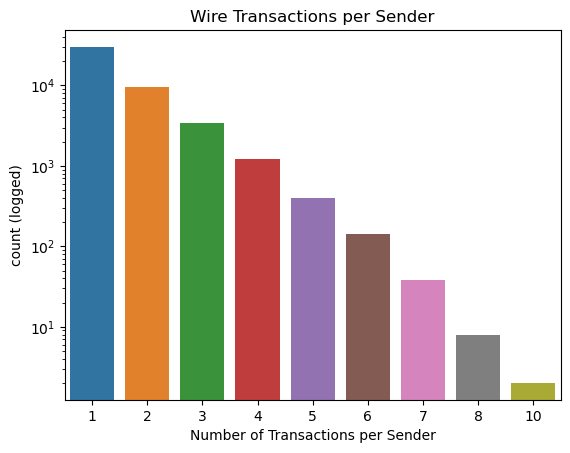

In [34]:
# plot the frequency of number of transactions per customer
ax = sns.countplot(gpby_sender, x='Number of Transactions')
ax.set_yscale('log')
ax.set(ylabel='count (logged)', xlabel='Number of Transactions per Sender', title='Wire Transactions per Sender');

In [35]:
# find the id of the reciever with the most wire transactions
gpby_rec = pd.DataFrame(wire2.groupby('id receiver')['id sender'].count())
gpby_rec = gpby_rec.sort_values(by='id sender', ascending=False).reset_index()
gpby_rec = gpby_rec.rename(columns={'id sender': 'Number of Transactions'})
gpby_rec

,id receiver,Number of Transactions
0,CUST65279578,12
1,CUST20110207,11
2,CUST29837239,10
3,CUST77242292,9
4,CUST11139389,9
...,...,...
44707,CUST79489912,1
44708,CUST30691449,1
44709,CUST79487363,1
44710,CUST79487199,1


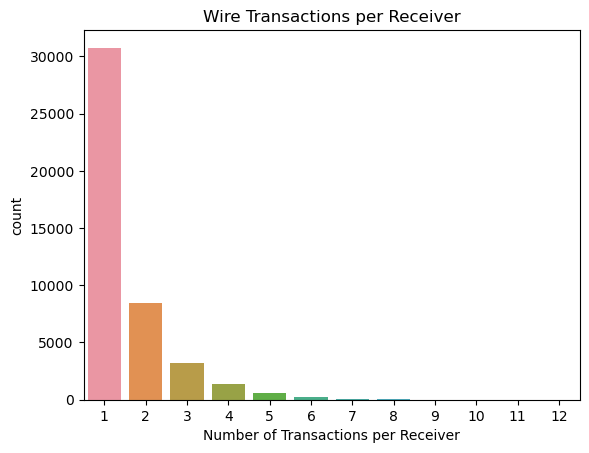

In [36]:
# plot the frequency of number of transactions per customer
ax = sns.countplot(gpby_rec, x='Number of Transactions')
ax.set(xlabel='Number of Transactions per Receiver', title='Wire Transactions per Receiver');

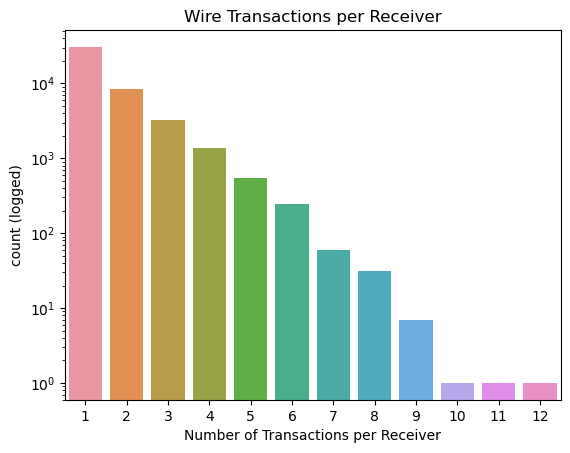

In [37]:
# plot the frequency of number of transactions per customer
ax = sns.countplot(gpby_rec, x='Number of Transactions')
ax.set_yscale('log')
ax.set(ylabel='count (logged)', xlabel='Number of Transactions per Receiver', title='Wire Transactions per Receiver');